[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_06-TheMachineLearningFramework/blob/master/M06_CCS--Regression_Coding_Challenge.ipynb)

# Linear Regression by Hand

In this challenge we'll be doing a linear fit with just one input variable and one output. We'll assume that our data can be modeled way using the function y = ax + b for some values of a and b. Your job is to find the best values of a and b, the ones that make our model best fit the data. First, let's import the libraries we'll need.

In [ ]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

Now let's grab the data. This is a fictional data set made for the purpose of this exercise.

In [ ]:
url="https://raw.githubusercontent.com/mathewphilipc/LambdaDataSets/master/linear_data.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

Your first job is to visit that URL and poke around in the data. However you wish to do so, store the first column as a vector x and store the second column as a vector y. We'll think of x as the input and y as the output.

In [6]:
# x = ??
# y = ??
print(data.head())
x = data['x']
y = data['y']

            x           y
0  205.382872  616.407840
1  221.233713  652.421931
2  245.569860  645.846659
3  253.604459  775.237334
4  271.523391  780.029564


We also like to start by getting a sense of this data, so next let's make a scatterplot.

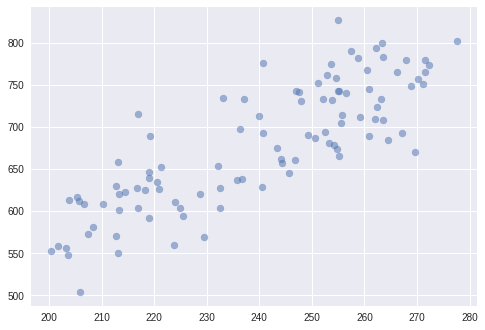

In [7]:
plt.scatter(x, y, alpha=0.5);

Now here's the fun part: whenever we model data like this using a function f(x), we like to compute the "SSE", or "sum of squared errors."

This means that, for every input number x_i, we calculate both the actual corresponding output y_i and the output the model predicts, which is f(x_i).

We can quantify how badly the model did at predicting that point by calculating the square of the difference between the two: $error_i = (y_i - f(x_i))^2$.

Then we can quantify how badly the model did at all points by computing that squared difference for every indidividual point and adding them all up. Remember bigger = worse here.

Calculate the SSE (call it particular_SSE) we would get if we used the linear model f(x) = ax + b with a = 20 and b = 70.

In [14]:
a = 20
b = 70
first = x[0]*a + b - y[0]
print(first)
sum = 0
for index,val in enumerate(x):
    se = x[index]*a + b - y[index]
    sum = sum + se**2

print(sum)

3561.2496081701
1767473752.713384


Now here's the really fun part: write a function error(a,b) that takes in the numbers a and b as inputs and calculates the SSE we would get using the model f(x) = ax + b.

In [ ]:
def error(a,b):
  sum = 0
  for index,val in enumerate(x):
      se = x[index]*a + b - y[index]
      sum = sum + se**2
  return sum

Earlier we calculated error(a,b) when a = 20 and b = 70. What happens to the error if you replace that with a = 21? Does the error go up or down? What about if we replace a = 20 with a = 19 instead? What if we start tweaking b as well? However you want to do so, tweak a and b to make the SSE as small as possible. Report back with the a and b that you find and the corresponding SSE.

1767473752.713384
1975730995.132117
208257242.41873312
-196660608.64430952
1570813144.0690744
[1.97573100e+09 1.76747375e+09 1.57081314e+09 1.38574917e+09
 1.21228183e+09 1.05041112e+09 9.00137047e+08 7.61459607e+08
 6.34378801e+08 5.18894629e+08 4.15007091e+08 3.22716186e+08
 2.42021915e+08 1.72924278e+08 1.15423275e+08 6.95189052e+07
 3.52111694e+07 1.25000673e+07 1.38559908e+06 1.86776460e+06
 1.39465639e+07 3.76219970e+07 7.28940638e+07 1.19762764e+08
 1.78228099e+08 2.48290067e+08 3.29948669e+08 4.23203905e+08
 5.28055774e+08 6.44504277e+08 7.72549414e+08 9.12191185e+08
 1.06342959e+09 1.22626463e+09 1.40069630e+09 1.58672461e+09
 1.78434955e+09 1.99357112e+09 2.21438933e+09 2.44680417e+09
 2.69081564e+09 2.94642375e+09 3.21362849e+09]


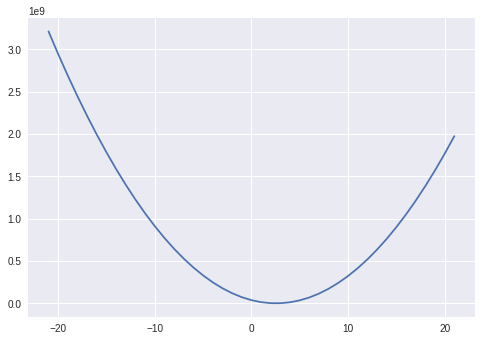

In [32]:
error_a_20 = error(20,70)
error_a_21 = error(21,70)
print(error_a_20)
print(error_a_21)
print(error_a_21-error_a_20)
print(error(19,70)-error(20,70))
print(error(19,70))

a_range = np.linspace(21,-21,43)
b_range = np.ones(43)*70
errors = error(a_range,b_range)
print(errors)
plt.plot(a_range,errors)

I found that range -20 to 20 demonstrated a minimum near 5. I am going to rerun with a smaller range.

[12500067.33513921  6662683.98078922  2680762.03034684   554301.48381207
   283302.34118492  1867764.60246539  5307688.26765348 10603073.33674917
 17753919.80975249 26760227.68666342 37621996.96748196]


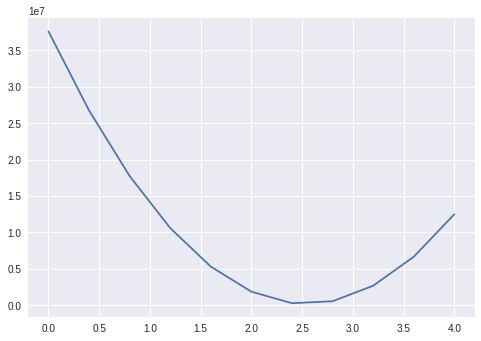

In [34]:
a_range = np.linspace(4,0,11)
b_range = np.ones(11)*70
errors = error(a_range,b_range)
print(errors)
plt.plot(a_range,errors)

Identifying 2.4 as the approximate minimum for `a`.

Now lets lock `a` and do the same with `b`.

283302.34118492156


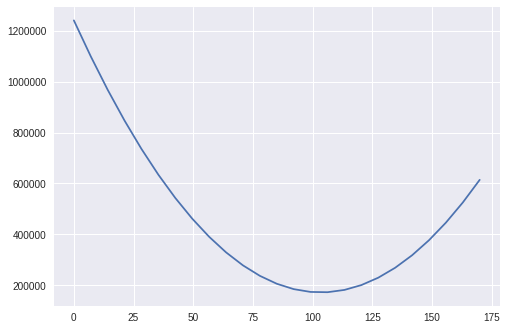

In [36]:
a = 2.4
b = 70
print(error(a,b))

range_b = np.linspace(0,170,25)
fixed_a = np.ones(25)*2.4
b_errors = error(fixed_a,range_b)
plt.plot(range_b,b_errors)


Learned that ~110 is optimum b, try again in a smaller range

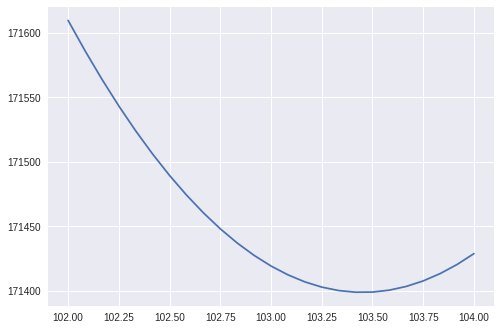

In [39]:
range_b = np.linspace(102,104,25)
fixed_a = np.ones(25)*2.4
b_errors = error(fixed_a,range_b)
plt.plot(range_b,b_errors)

Best b is 103.5

2.4 70
[2.79897211 7.76886308]


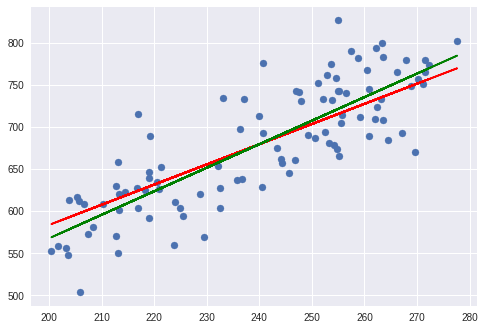

In [45]:
plt.scatter(x,y)
print(a,b)
plt.plot(x,x*a+103.5,'r')
solution = np.polyfit(x,y,1)
plt.plot(x,solution[0]*x+solution[1],'g')
print(solution)